In [1]:
import pandas as pd 
import numpy as np 

In [5]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

In [14]:
df1 = df.drop(['Weight'],axis='columns')
df1.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


## Visualisation

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

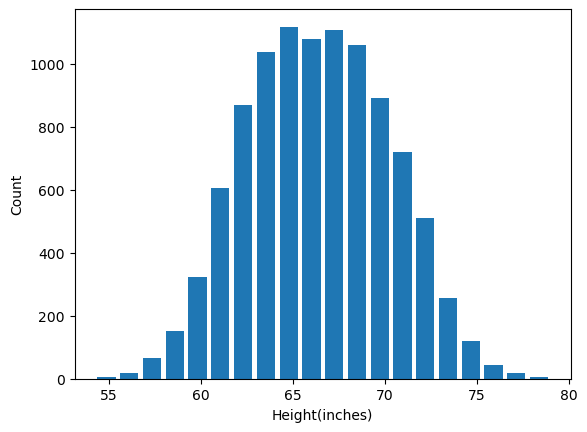

In [20]:
plt.hist(df1.Height, bins=20, rwidth=0.8)  #ploting histogram 
plt.xlabel('Height(inches)')     # labeling x axis
plt.ylabel('Count')           # labeling y axis
plt.show()

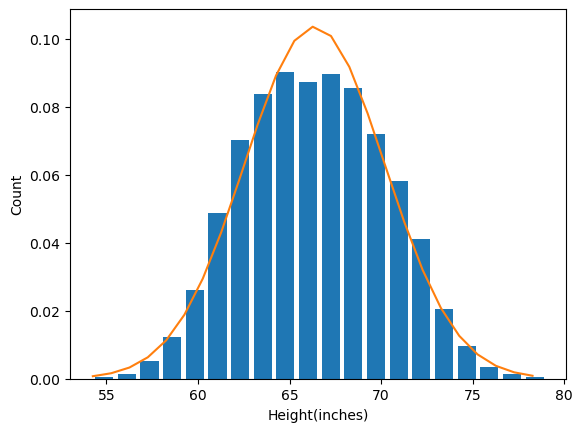

In [27]:
# plot bell curve along wuth the histogram 

from scipy.stats import norm
plt.hist(df1.Height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height(inches)')
plt.ylabel('Count') 

# conditions to plot bell curve 
rng= np.arange(df.Height.min(), df.Height.max())
plt.plot(rng, norm.pdf(rng,df.Height.mean(), df.Height.std()))

In [28]:
df1.describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


### Outlier Detection and Removal using 3 Standard Deviation 

In [30]:
upper_limit = df.Height.mean() + 3*df.Height.std()
upper_limit

77.91014411714094

In [32]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250154

In [34]:
# removable outliers 
df[(df.Height>upper_limit) | (df.Height<lower_limit)]


,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [35]:
df_no_outliers = df[(df.Height<upper_limit) & (df.Height>lower_limit)]

In [37]:
df_no_outliers

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [40]:
df_no_outliers.shape

(9993, 3)

In [41]:
df.shape

(10000, 3)

Out of 10000 data points, we removed 7 outliers